In [189]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("adult_spread.csv")


In [190]:
print(df.describe())


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week       Private     Local_gov  Self_emp_not_inc  \
count    48842.000000  48842.000000  48842.000000      48842.000000   
mean        40.422382   1777.358912    162.249662        184.489067   
std         12.391444   1660.576345    704.811992        735.71164

In [191]:
print(df[["age","fnlwgt" ,"education_num", "capital_gain", "capital_loss"]].var(skipna=True, numeric_only=True))


age              1.879781e+02
fnlwgt           1.115221e+10
education_num    6.609901e+00
capital_gain     5.553259e+07
capital_loss     1.624127e+05
dtype: float64


In [192]:
private_df = df[df['workclass'] == 'Private'] 


In [193]:
private_workers = private_df[["Preschool","1st_4th","5th_6th","7th_8th","10th","11th","12th","HS_grad","Assoc_voc","Prof_school","Some_college","Assoc_acdm","Bachelors","Masters","Doctorate"]].sum()


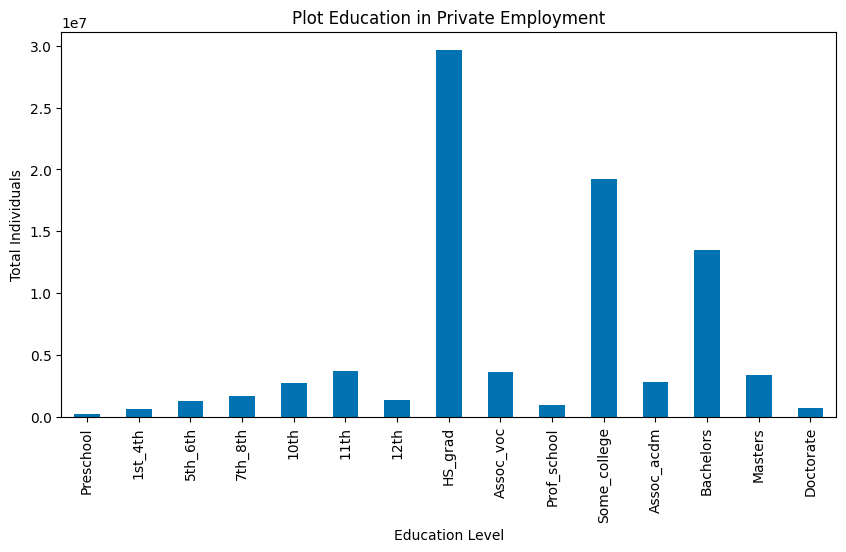

In [211]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
private_workers.plot.bar().set(title='Education in Private Employment')

plt.xlabel("Education Level")
plt.ylabel("Total Individuals")

plt.savefig("Education in Private Employment (PY).png")

plt.show()


In [196]:
all_workers = df[["Preschool","1st_4th","5th_6th","7th_8th","10th","11th","12th","HS_grad","Assoc_voc","Prof_school","Some_college","Assoc_acdm","Bachelors","Masters","Doctorate"]].sum()


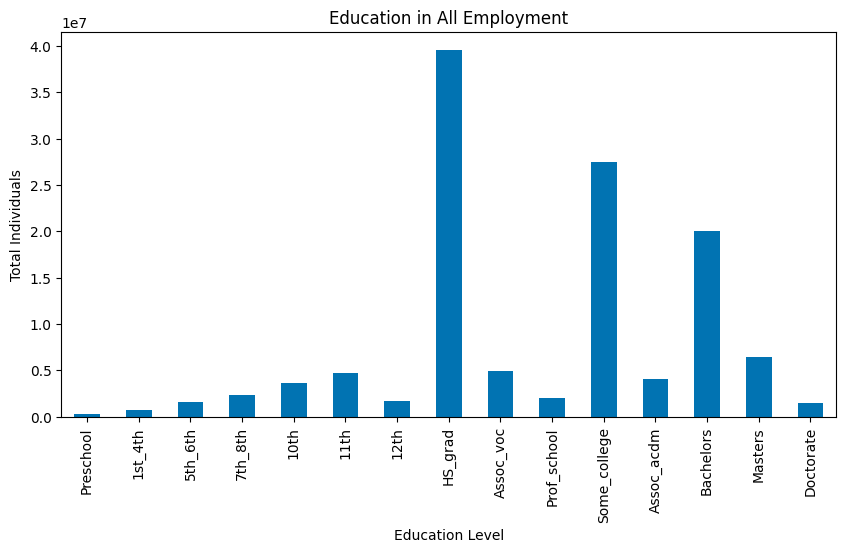

In [213]:
plt.figure(figsize = (10, 5))

# creating the bar plot
all_workers.plot.bar().set(title='Education in All Employment')

plt.xlabel("Education Level")
plt.ylabel("Total Individuals")

plt.savefig("Education in All Employment (PY).png")

plt.show()


In [199]:
Federal_gov_df = df[df['class'] == '>50K'][["Preschool","1st_4th","5th_6th","7th_8th","10th","11th","12th","HS_grad","Assoc_voc","Prof_school","Some_college","Assoc_acdm","Bachelors","Masters","Doctorate"]].sum() 


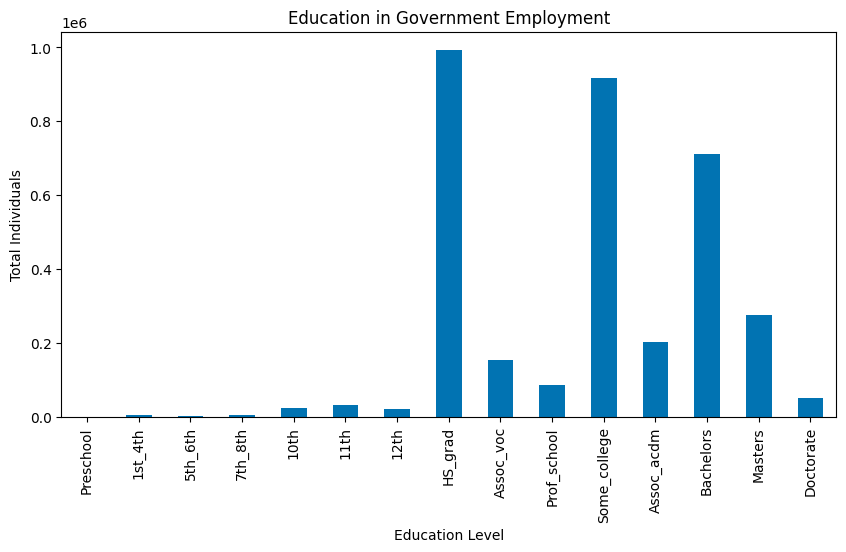

In [214]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
Federal_gov_workers.plot.bar().set(title="Education in Government Employment")

plt.xlabel("Education Level")
plt.ylabel("Total Individuals")

plt.savefig("Education in Government Employment (PY).png")

plt.show()


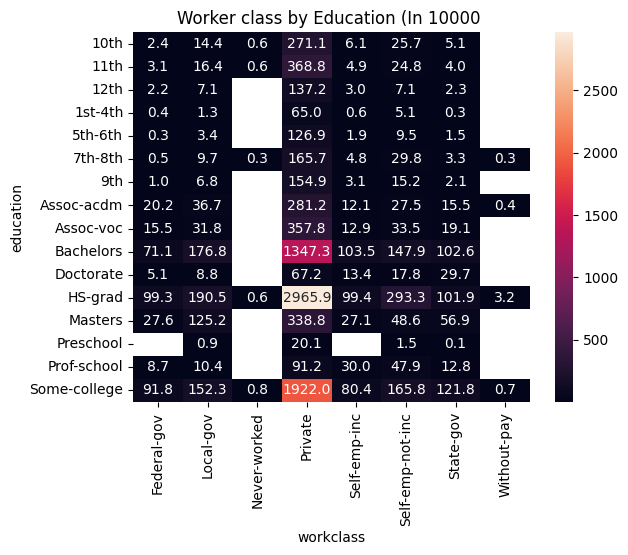

In [215]:

sumed = df.groupby(['workclass','education'], sort=True)["Total"].sum("Total")/10000
unstacked = sumed.unstack(level=0)
sns.heatmap(unstacked, annot=True, fmt=".1f").set(title="Worker class by Education (In 10000 ")
plt.xlabel("workclass")
plt.ylabel("education")
plt.savefig("Worker class by Education (In 10000 (PY).png")
plt.show()


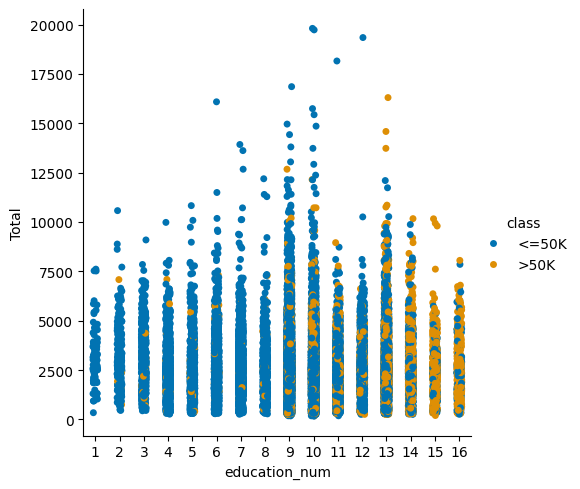

In [220]:
sns.color_palette("Spectral", as_cmap=True)
sns.catplot(x="education_num", y="Total", hue="class", data=df)
plt.savefig("Facet grid of Education vs Total Workers in Each Category.png")
plt.show()


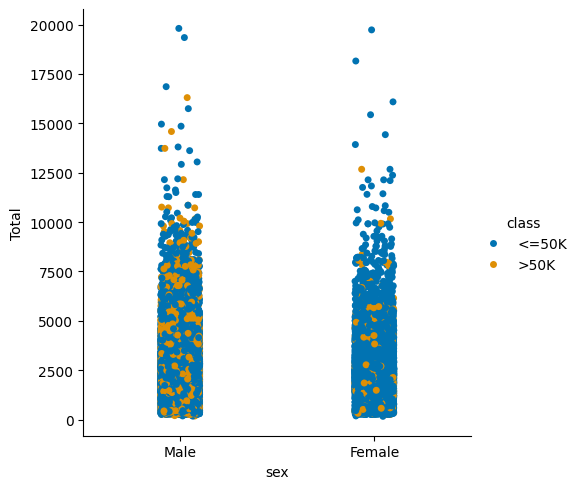

In [205]:
sns.color_palette("Spectral", as_cmap=True)
sns.catplot(x="sex", y="Total", hue="class", data=df)
plt.savefig("Males and Females vs Group Size by Class")
plt.show()


In [206]:
grouped = df.groupby(["education_num","class"])['Total'].sum().reset_index()


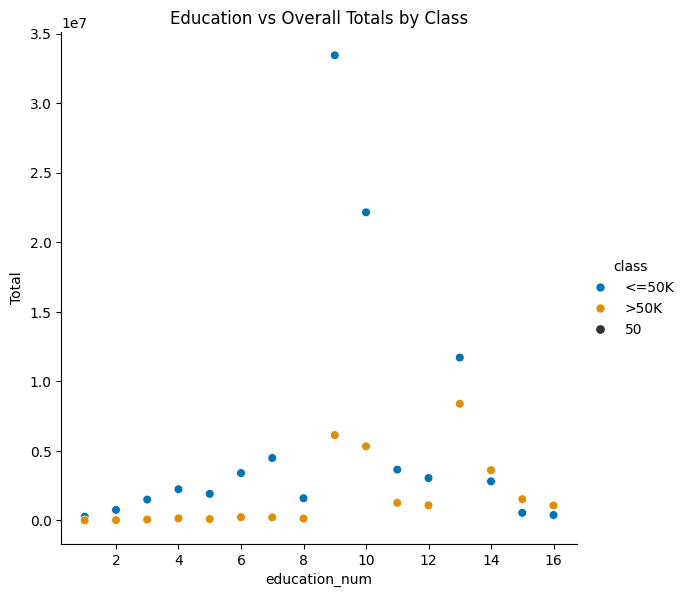

In [221]:
sns.relplot(x="education_num", y="Total", hue="class", size=50, sizes=(40, 400), height=6, data=grouped).set(title="Education vs Overall Totals by Class")
plt.savefig("Education vs Overall Totals by Class (PY).png")
plt.show()
